In [53]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# The code is setup right now for obtaining nonlinear representations, and displays some of the resulting filters
# for comparison against the filters learned by the SVD -- these are very different. You can switch up the activation and loss functions as
# indicated below to get an autoencoder that should approximate the SVD, and visualize this by comparing the filters --- they should be 
# visually similar

In [54]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Our model
autoencoder = keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(encoding_dim, activation='relu'), #linear
    layers.Dense(784, activation='sigmoid') #linear
])

In [55]:
# just the encoder part of the network, sharing weights with the trained autoencoder
inputs = keras.Input(shape=(784,))
encoded = autoencoder.layers[0]
encoder = keras.Model(inputs, encoded(inputs))

# just the decoder part of the network, sharing weights with the trained autoencoder
inputs = keras.Input(shape=(encoding_dim,))
decoded = autoencoder.layers[1]
decoder = keras.Model(inputs, decoded(inputs))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy') #MeanSquaredError


In [56]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [57]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2756 - val_loss: 0.1908
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1718 - val_loss: 0.1547
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1454 - val_loss: 0.1348
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1296 - val_loss: 0.1225
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1194 - val_loss: 0.1139
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1121 - val_loss: 0.1077
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1066 - val_loss: 0.1031
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1025 - val_loss: 0.0995
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0996 - val_loss: 0.0971
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0976 - val_loss: 0.0955

In [58]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


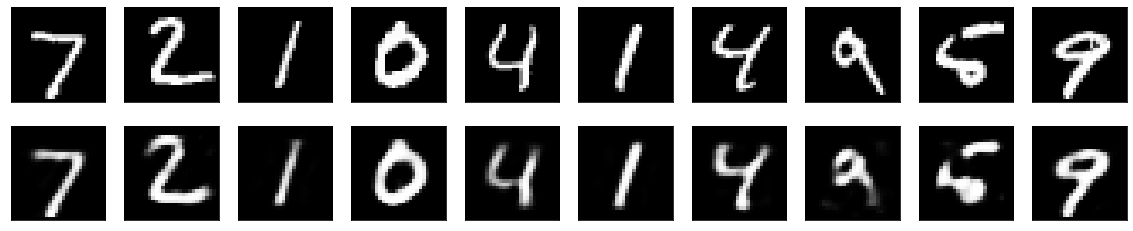

In [59]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


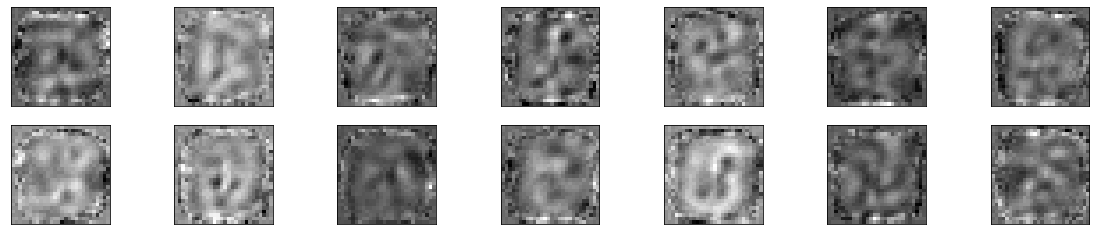

In [61]:
encoderWeights = autoencoder.layers[0].kernel

numfilters = 14
plt.figure(figsize=(20, 4))
for i in range(numfilters//2):
    # Display original
    ax = plt.subplot(2, numfilters//2, i + 1)
    plt.imshow(encoderWeights[:,i].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, numfilters//2, i + 1 + numfilters//2)
    plt.imshow(encoderWeights[:,i+numfilters//2].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

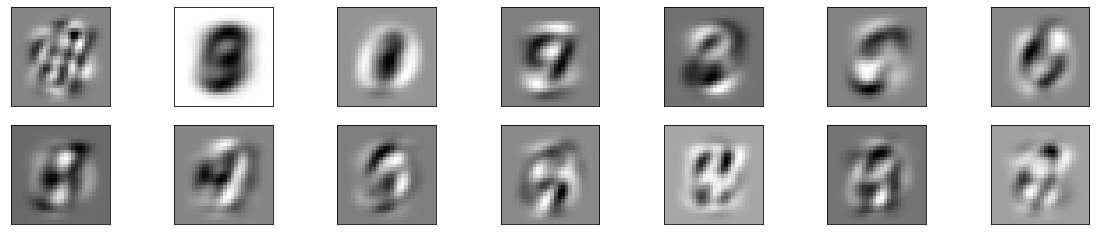

In [62]:
from scipy.sparse.linalg import svds

u, s, w = svds(x_train.T, encoding_dim)

numfilters = 14
plt.figure(figsize=(20, 4))
for i in range(numfilters//2):
    # Display original
    ax = plt.subplot(2, numfilters//2, i + 1)
    plt.imshow(u[:,-i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, numfilters//2, i + 1 + numfilters//2)
    plt.imshow(u[:,-i-numfilters//2].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()